In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks, hough_line,\
                              hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from skimage.draw import circle_perimeter, circle
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.transform import resize
import gc

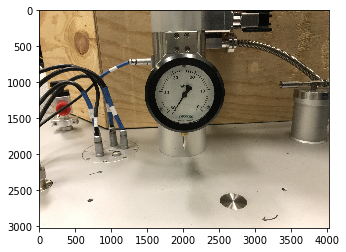

In [6]:
image = imread('../Burst/IMG_5228.jpg', as_gray=False)
plt.imshow(image)

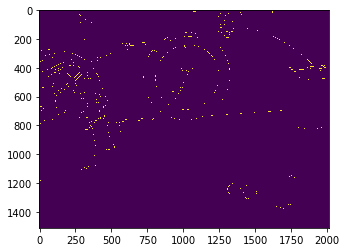

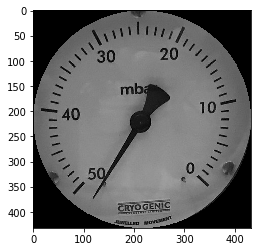

In [2]:
# Load picture and detect edges
#image = img_as_ubyte(data.coins()[160:230, 70:270])
image = imread('IMG_5226.jpg', as_gray=True)
edges = canny(image, sigma=5)
plt.imshow(edges)

# Detect two radii
hough_radii = np.arange(100, 300, 5)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

center_x, center_y, radius = np.mean(np.array([cx, cy, radii]), axis=1, dtype=int)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)

circx, circy = circle(center_y, center_x, radius)

mask = np.zeros(image.shape)
mask[circx, circy] = 1
image = image * mask

xmin, xmax, ymin, ymax = center_y - radius, center_y + radius, center_x - radius, center_x + radius
ax.imshow(image[xmin:xmax, ymin:ymax], cmap=plt.cm.gray)
plt.show()

In [ ]:
# Load picture and detect edges
#image = img_as_ubyte(data.coins()[160:230, 70:270])
np.random.seed(1223)

idxs = np.random.randint(5228, 6162, size=5)
idxs = np.arange(5228, 6162)
for idx in idxs:
    
    gc.collect()
    try:
        del image
        del edges
    except:
        True
    
    print(idx)
    image = imread('Burst/IMG_{}.jpg'.format(idx), as_gray=True)

    edges = canny(image, sigma=5, low_threshold=0.01, high_threshold=0.2)

    # Detect two radii
    hough_radii = np.arange(100, 600, 10)
    hough_res = hough_circle(edges, hough_radii)
    del edges

    #fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    #ax = axes.ravel()

    # Select the most prominent 5 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=3)

    center_x, center_y, radius = np.mean(np.array([cx, cy, radii]), axis=1, dtype=int)

    # Draw them
    #ax[0].imshow(image, cmap=plt.cm.gray)
    #ax[0].set_title('Input image')

    #ax[1].imshow(edges, cmap=plt.cm.gray)
    #ax[1].set_title('Canny edges')

    image = color.gray2rgb(image)

    circx, circy = circle(center_y, center_x, radius)

    mask = np.zeros(image.shape)
    mask[circx, circy] = 1
    image = image * mask

    xmin, xmax, ymin, ymax = center_y - radius, center_y + radius, center_x - radius, center_x + radius
    image = image[xmin:xmax, ymin:ymax]
    image = rgb2gray(image)
    image = resize(image, (200, 200))
    #ax[2].imshow(image, cmap=plt.cm.gray)
    #plt.show()
    plt.imsave('Preprocessed/IMG_{}.jpg'.format(idx), image, cmap=plt.cm.gray)
    
    del image
    gc.collect()

In [ ]:
# Load picture and detect edges
#image = img_as_ubyte(data.coins()[160:230, 70:270])
np.random.seed(1223)

idxs = np.random.randint(5228, 6162, size=5)
idxs = np.arange(6001, 6162)
for idx in idxs:
    
    gc.collect()
    try:
        del image
        del edges
    except:
        True
    
    print(idx)
    image = imread('Burst/IMG_{}.jpg'.format(idx), as_gray=True)

    edges = canny(image, sigma=5, low_threshold=0.01, high_threshold=0.2)

    # Detect two radii
    hough_radii = np.arange(100, 600, 10)
    hough_res = hough_circle(edges, hough_radii)
    del edges

    #fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    #ax = axes.ravel()

    # Select the most prominent 5 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=3)

    center_x, center_y, radius = np.mean(np.array([cx, cy, radii]), axis=1, dtype=int)

    # Draw them
    #ax[0].imshow(image, cmap=plt.cm.gray)
    #ax[0].set_title('Input image')

    #ax[1].imshow(edges, cmap=plt.cm.gray)
    #ax[1].set_title('Canny edges')

    image = color.gray2rgb(image)

    circx, circy = circle(center_y, center_x, radius)

    mask = np.zeros(image.shape)
    mask[circx, circy] = 1
    image = image * mask

    xmin, xmax, ymin, ymax = center_y - radius, center_y + radius, center_x - radius, center_x + radius
    image = image[xmin:xmax, ymin:ymax]
    image = rgb2gray(image)
    image = resize(image, (200, 200))
    #ax[2].imshow(image, cmap=plt.cm.gray)
    #plt.show()
    plt.imsave('Preprocessed/IMG_{}.jpg'.format(idx), image, cmap=plt.cm.gray)
    
    del image
    gc.collect()

In [ ]:
"""
edges = gaussian(image, sigma=3)
edges = canny(image, sigma=3)
lines = probabilistic_hough_line(edges, threshold=10, line_length=10,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()
"""